# GPcounts on bulk dataset

Nuha BinTayyash, 2020

This notebook shows how to run [DESeq2](https://bioconductor.org/packages/release/bioc/html/DESeq2.html) R package to normalize [fission yeast](https://bioconductor.org/packages/release/data/experiment/html/fission.html) gene expression data. Then, compare GPcounts with negative binomial likelihood and Gaussian likelihood to find differentially expressed genes in one sample test and two-sample tests.

In [1]:
import numpy as np
import pandas as pd
import gpflow

In [2]:
Y = pd.read_csv('exons_counts.csv',index_col=[0])
X = pd.read_csv('time_points.csv',index_col=[0])
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) 
X

,time
E11_1_F,0.00
E12_1_F,0.08
E13A_1_F,0.16
E13B_1_F,0.24
E14A_1_F,0.40
E14B_1_F,0.52
E14C_1_F,0.64
E14D_1_F,0.76
E14E_1_F,0.88
ECF_1_F,1.00


Fit some fission gene normalized data using GPcounts -- Two samples test

In [3]:
from matplotlib import pyplot as plt
import statsmodels.api as sm

def plot():
    plt.tick_params(labelsize='large', width=2)     
    #plt.ylabel('Gene Expression', fontsize=16)
    #plt.xlabel('Times', fontsize=16)
    c = 'royalblue'
    
    if model_index == 3:
        c = 'green'
    
    plt.plot(xtest, mean,color= c, lw=2) 
    
    if likelihood == 'Gaussian':
        plt.fill_between(xtest[:,0],
                            mean[:,0] - 1*np.sqrt(var[:,0]),
                            mean[:,0] + 1*np.sqrt(var[:,0]),color=c,alpha=0.2) # one standard deviation
        plt.fill_between(xtest[:,0],
                            mean[:,0] - 2*np.sqrt(var[:,0]),
                            mean[:,0] + 2*np.sqrt(var[:,0]),color=c, alpha=0.1)# two standard deviation
    else:
       
        lowess = sm.nonparametric.lowess    
        # one standard deviation 68%
        percentile_16 = lowess(np.percentile(var, 16, axis=0),xtest[:,0],frac=1./5, return_sorted=False)
        percentile_16 = [(i > 0) * i for i in percentile_16]
        percentile_84 = lowess(np.percentile(var, 84, axis=0),xtest[:,0],frac=1./5, return_sorted=False)
        percentile_84 = [(i > 0) * i for i in percentile_84]
        plt.fill_between(xtest[:,0],percentile_16,percentile_84,color=c,alpha=0.2)
        
        # two standard deviation 95%
        percentile_5 = lowess(np.percentile(var, 5, axis=0),xtest[:,0],frac=1./5, return_sorted=False)
        percentile_5 = [(i > 0) * i for i in percentile_5]
        percentile_95 = lowess(np.percentile(var,95, axis=0),xtest[:,0],frac=1./5, return_sorted=False)
        percentile_95 = [(i > 0) * i for i in percentile_95]
        plt.fill_between(xtest[:,0],percentile_5,percentile_95,color=c,alpha=0.1)
    
    if test == 'Two_samples_test' and model_index == 1:
        plt.scatter(model.data[0][0:int(model.data[0].shape[0]/2)],model.data[1][0:int(model.data[0].shape[0]/2)], s=30, marker='o', color= 'royalblue',alpha=1.) #data    
        plt.scatter(model.data[0][int(model.data[0].shape[0]/2)::],model.data[1][int(model.data[0].shape[0]/2)::], s=30, marker='o', color= 'green',alpha=1.) #data

    else: 
        plt.scatter(model.data[0],model.data[1],s=30,marker = 'o',color=c,alpha=1.)
    
    
    if not(test == 'Two_samples_test' and model_index == 2):
        plt.show()
    

In [4]:
genes_name = [
 'FBgn0003638',
 'FBgn0004237',
 'FBgn0010226',
 'FBgn0010504',
 'FBgn0011888',
 'FBgn0011944',
 'FBgn0011994',
 'FBgn0013679',
 'FBgn0013681',
 'FBgn0013684',
 'FBgn0015791',
 'FBgn0022710']

In [5]:
from GPcounts.GPcounts_Module import Fit_GPcounts
likelihood = 'Negative_binomial' 
gp_counts = Fit_GPcounts(X,Y.loc[genes_name])
log_likelihood_ratio = gp_counts.One_sample_test(likelihood)
log_likelihood_ratio

  0%|          | 0/12 [00:00<?, ?it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.02462602693231549, 'km': 35.0}


  8%|▊         | 1/12 [00:06<01:12,  6.60s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.310774452073752, 'km': 35.0}


 17%|█▋        | 2/12 [00:08<00:51,  5.15s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.03331750375576969, 'km': 35.0}


 25%|██▌       | 3/12 [00:10<00:38,  4.30s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.03203119100705425, 'km': 35.0}


 33%|███▎      | 4/12 [00:12<00:29,  3.69s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.07479541587620692, 'km': 35.0}


 42%|████▏     | 5/12 [00:15<00:22,  3.22s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 1.180526509390951e-06, 'km': 35.0}


 50%|█████     | 6/12 [00:16<00:16,  2.80s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.0001350481813823838, 'km': 35.0}


 58%|█████▊    | 7/12 [00:18<00:12,  2.51s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 2.5568691782558433, 'km': 35.0}


 67%|██████▋   | 8/12 [00:20<00:09,  2.30s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.4921574823218249, 'km': 35.0}


 75%|███████▌  | 9/12 [00:22<00:06,  2.16s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.23697392317510518, 'km': 35.0}


 83%|████████▎ | 10/12 [00:24<00:04,  2.09s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.038048596041085125, 'km': 35.0}


 92%|█████████▏| 11/12 [00:26<00:02,  2.15s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.10664174040414365, 'km': 35.0}


100%|██████████| 12/12 [00:28<00:00,  2.36s/it]


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
FBgn0003638,-116.197927,-116.184053,-0.013874
FBgn0004237,-216.912750,-207.334623,-9.578127
FBgn0010226,-157.257606,-156.959851,-0.297754
FBgn0010504,-94.151059,-94.150810,-0.000249
FBgn0011888,-87.025256,-88.573701,1.548445
FBgn0011944,-25.073792,-26.077070,1.003279
FBgn0011994,-18.680576,-21.128341,2.447765
FBgn0013679,-202.450207,-187.019488,-15.430718
FBgn0013681,-96.179386,-96.972046,0.792660
FBgn0013684,-166.305964,-166.219401,-0.086563


  0%|          | 0/12 [00:00<?, ?it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


  8%|▊         | 1/12 [00:01<00:11,  1.00s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 17%|█▋        | 2/12 [00:01<00:09,  1.01it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 25%|██▌       | 3/12 [00:03<00:09,  1.00s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 33%|███▎      | 4/12 [00:04<00:08,  1.04s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 42%|████▏     | 5/12 [00:05<00:07,  1.06s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 50%|█████     | 6/12 [00:06<00:06,  1.01s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 58%|█████▊    | 7/12 [00:07<00:04,  1.01it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 8/12 [00:08<00:04,  1.02s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 75%|███████▌  | 9/12 [00:09<00:03,  1.02s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 83%|████████▎ | 10/12 [00:10<00:02,  1.01s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 92%|█████████▏| 11/12 [00:11<00:01,  1.02s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


FBgn0003638


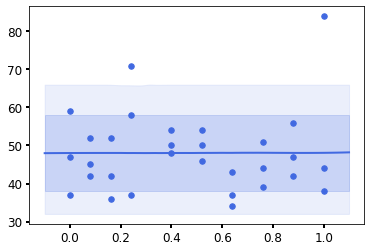

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,14.544684379704638
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,188.11171503123273
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.02462602693231549
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.01465599e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.05093614e-02, 0.00000000e+00, 0.00000000e+00..."


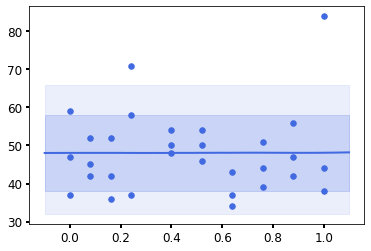

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,14.93014124238482
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.02462602693231549
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00160941e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-1.00806722e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0004237


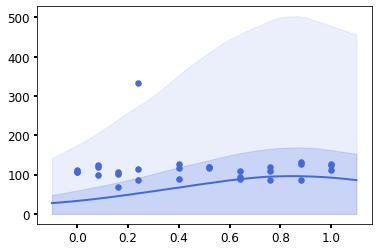

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,4.589716897390264
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.6295453473297181
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.310774452073752
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.63041488e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[7.32397086e-02, 0.00000000e+00, 0.00000000e+00..."


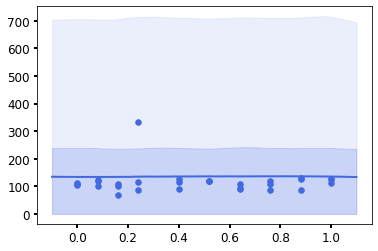

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,23.237524546709178
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,5.310774452073752
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.96321696e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-8.54985733e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0010226


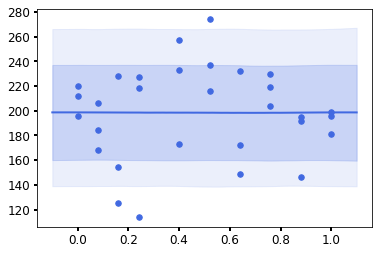

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,51.60566912522511
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,86.61404761849556
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.03331750375576969
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[7.36214849e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-6.60124964e-03, 0.00000000e+00, 0.00000000e+00..."


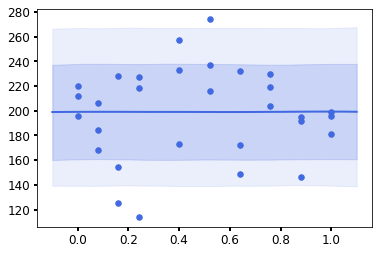

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,27.994614178289872
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.03331750375576969
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00006822e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-6.76046478e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0010504


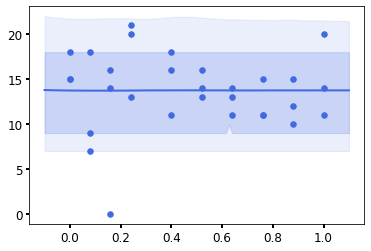

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,6.959600864598729
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,792.2111111296152
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.03203119100705425
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.91392643e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.24456610e-02, 0.00000000e+00, 0.00000000e+00..."


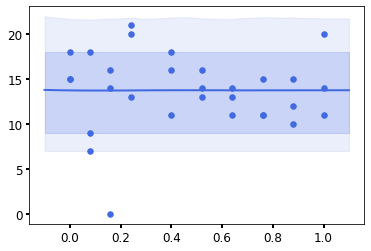

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,6.843259731139295
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.03203119100705425
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.99774398e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-2.26303392e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0011888


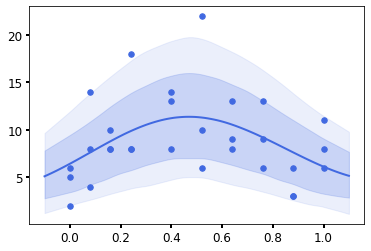

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,2.541342490912716
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.7928925020621834
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.07479541587620692
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.15344107e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.13004982e-01, 0.00000000e+00, 0.00000000e+00..."


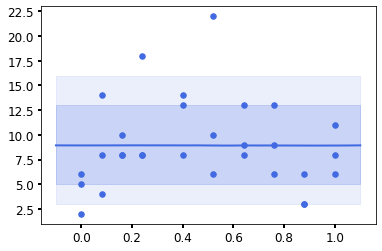

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,4.769782807276412
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.07479541587620692
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.99349130e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.61817064e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0011944


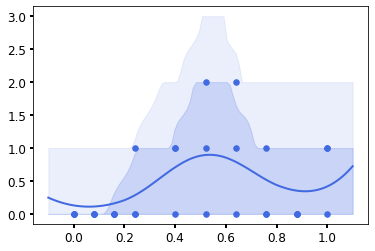

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,2.2266363443387736
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.2646687083508321
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.180526509390951e-06
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-1.53985482e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[5.54372802e-01, 0.00000000e+00, 0.00000000e+00..."


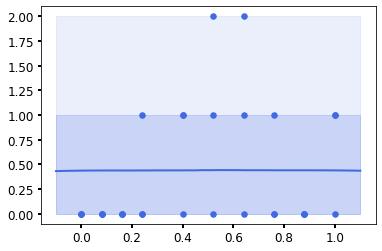

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.8218644296050511
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,1.180526509390951e-06
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.56422935e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.91987388e-01, 0.00000000e+00, 0.00000000e+00..."


FBgn0011994


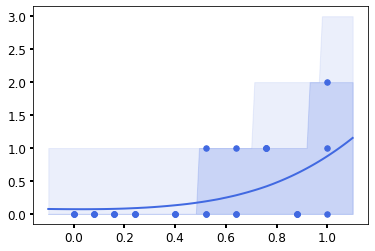

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,5.484899181597808
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.7787527106449379
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.0001350481813823838
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-1.31969088e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.96403168e-01, 0.00000000e+00, 0.00000000e+00..."


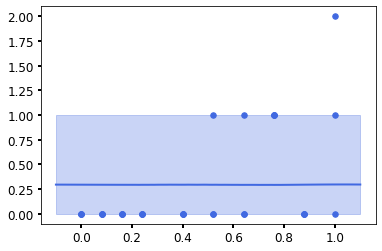

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.7674206485110462
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.0001350481813823838
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[-9.69083911e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.46730458e-01, 0.00000000e+00, 0.00000000e+00..."


FBgn0013679


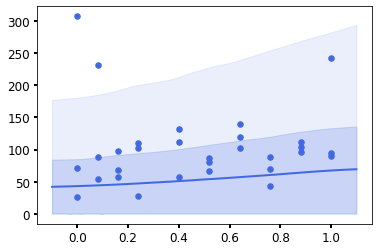

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,5.512297653486965
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,3.164856347843296
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,2.5568691782558433
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.60359786e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.74891861e-02, 0.00000000e+00, 0.00000000e+00..."


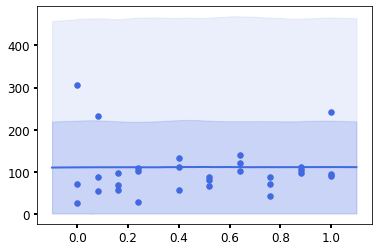

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,21.73896376381355
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,2.5568691782558433
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.98084754e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[6.20611488e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0013681


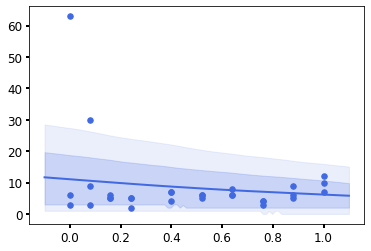

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,5.755267611324486
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,3.9449205206033477
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.4921574823218249
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.90283771e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[8.29156409e-02, 0.00000000e+00, 0.00000000e+00..."


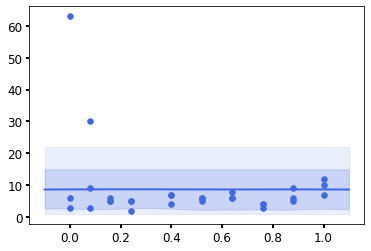

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,4.619646485872652
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.4921574823218249
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.97822520e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[6.60520259e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0013684


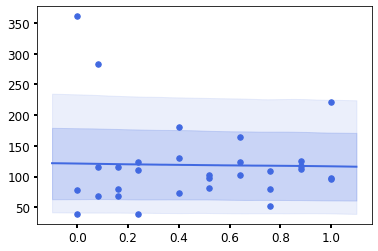

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,28.391733509904164
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,44.26229205385804
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.23697392317510518
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[8.98668668e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.93751845e-02, 0.00000000e+00, 0.00000000e+00..."


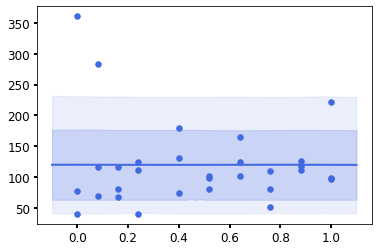

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,22.788551986623542
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.23697392317510518
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00068384e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.89313285e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0015791


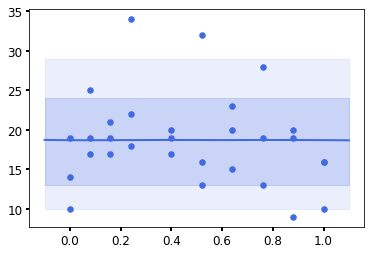

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.400378150184773
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,220.25888736764756
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.038048596041085125
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00948766e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-1.91935700e-02, 0.00000000e+00, 0.00000000e+00..."


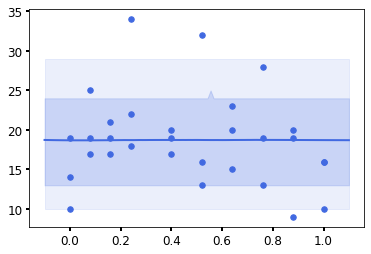

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.560460209256371
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.038048596041085125
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.99864909e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-1.88963925e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0022710


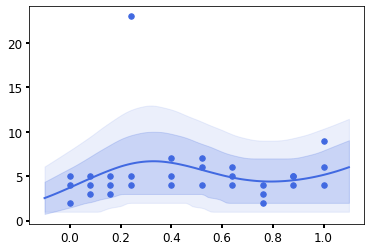

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,2.0799732492684484
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.4274536678654111
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.10664174040414365
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[8.76201659e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.76112620e-01, 0.00000000e+00, 0.00000000e+00..."


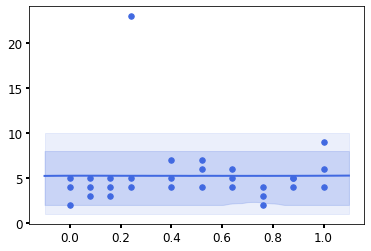

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,2.724577907719655
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.10664174040414365
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.98178078e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[6.03658603e-02, 0.00000000e+00, 0.00000000e+00..."


In [6]:
indexes = log_likelihood_ratio.index.values # list of genes to be plotted 
test = 'One_sample_test' # name of the test
xtest = np.linspace(np.min(X.values)-.1,np.max(X.values)+.1,100)[:,None] # points to make prediction
likelihood = 'Negative_binomial'
params = gp_counts.load_models(indexes,test,xtest,likelihood)

for i in range(len(indexes)):
    fig = plt.figure()
    print(indexes[i])
    model_index = 1
    for mean,var,model in zip(params['means'][i],params['vars'][i],params['models'][i]):
        plot() 
        model_index = model_index + 1
        gpflow.utilities.print_summary(model, fmt='notebook')

In [7]:
likelihood = 'Gaussian'
log_likelihood_ratio = gp_counts.One_sample_test(likelihood)
log_likelihood_ratio

  0%|          | 0/12 [00:00<?, ?it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


  8%|▊         | 1/12 [00:00<00:07,  1.47it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 17%|█▋        | 2/12 [00:01<00:06,  1.65it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 25%|██▌       | 3/12 [00:01<00:04,  1.81it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 33%|███▎      | 4/12 [00:01<00:04,  1.96it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 42%|████▏     | 5/12 [00:02<00:03,  2.10it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 50%|█████     | 6/12 [00:02<00:02,  2.23it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 58%|█████▊    | 7/12 [00:03<00:02,  2.25it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 8/12 [00:03<00:01,  2.12it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 75%|███████▌  | 9/12 [00:04<00:01,  2.20it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 83%|████████▎ | 10/12 [00:04<00:00,  2.25it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 92%|█████████▏| 11/12 [00:04<00:00,  2.30it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
FBgn0003638,1.228604,1.230142,-1.537622e-03
FBgn0004237,-6.213969,-6.213929,-3.956363e-05
FBgn0010226,0.545497,0.545552,-5.505268e-05
FBgn0010504,-27.521256,-27.521256,-4.620283e-07
FBgn0011888,-21.237937,-22.401008,1.163071e+00
FBgn0011944,-13.544147,-15.100712,1.556565e+00
FBgn0011994,-8.255771,-10.422715,2.166944e+00
FBgn0013679,-27.276797,-27.276792,-4.268012e-06
FBgn0013681,-29.691919,-29.691898,-2.125628e-05
FBgn0013684,-24.708148,-24.708022,-1.264383e-04


  0%|          | 0/12 [00:00<?, ?it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 17%|█▋        | 2/12 [00:00<00:00, 14.91it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 42%|████▏     | 5/12 [00:00<00:00, 13.02it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 58%|█████▊    | 7/12 [00:00<00:00, 10.40it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 75%|███████▌  | 9/12 [00:00<00:00,  9.49it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 12/12 [00:01<00:00, 11.00it/s]


{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
FBgn0003638


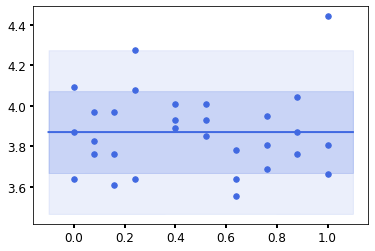

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,14.9569
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,630.999
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0395121


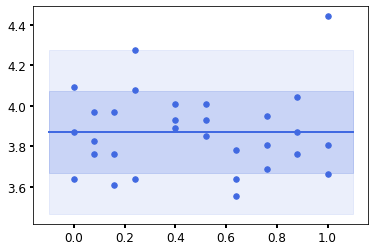

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,14.9833
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.03951


FBgn0004237


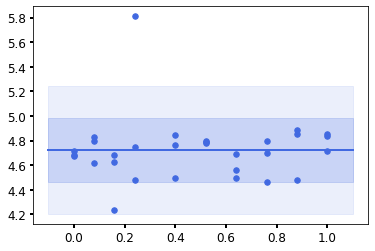

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,22.3067
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,3750.14
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0651191


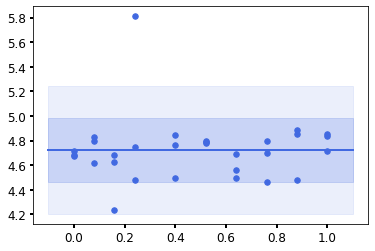

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,22.3076
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.065119


FBgn0010226


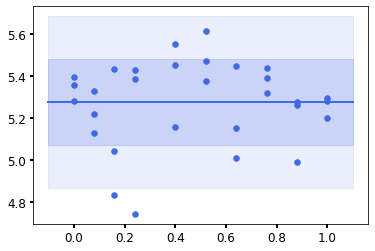

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,27.8447
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,4334.6
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0405443


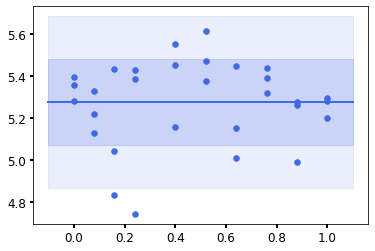

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,27.8465
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0405441


FBgn0010504


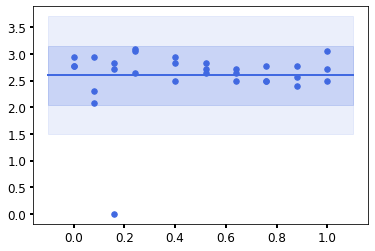

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,6.77138
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,7667.91
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.294933


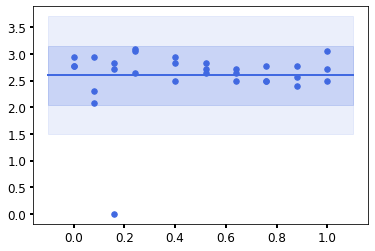

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,6.77131
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.294937


FBgn0011888


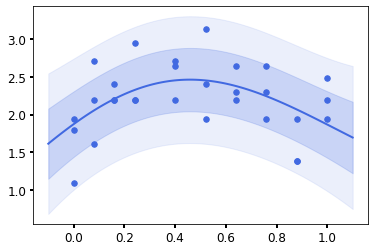

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,2.61818
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.794971
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.162209


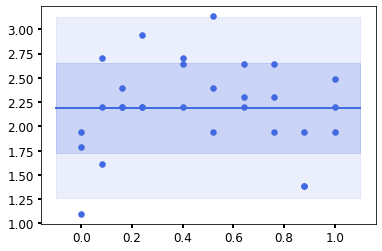

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,4.81536
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.20964


FBgn0011944


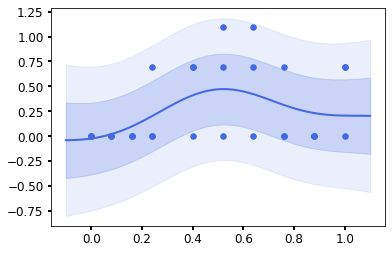

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.0849037
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.26639
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.114979


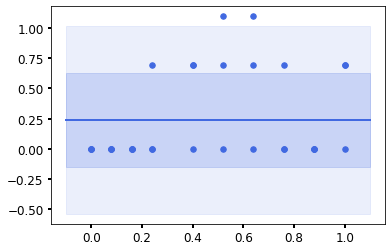

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.0617095
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.146875


FBgn0011994


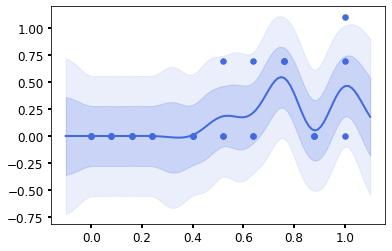

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.0762025
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.0696473
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0622566


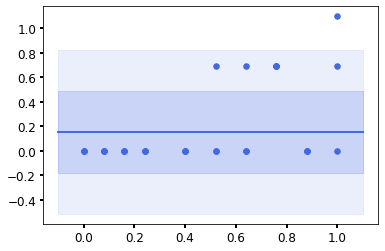

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.0270708
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.109251


FBgn0013679


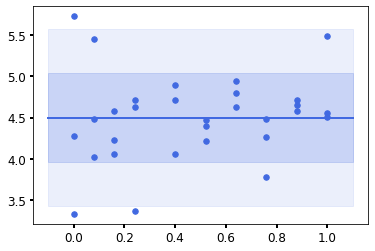

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,20.2537
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2530.44
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.279256


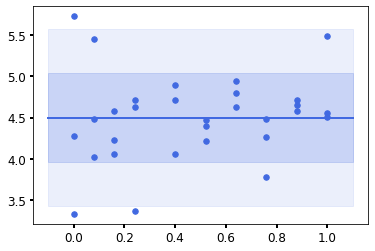

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,20.2633
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.279256


FBgn0013681


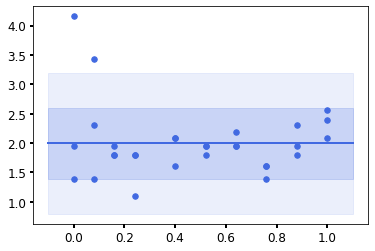

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,4.00275
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,888.393
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.34886


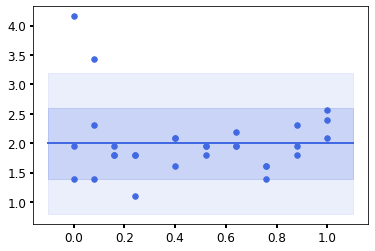

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,3.99557
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.348836


FBgn0013684


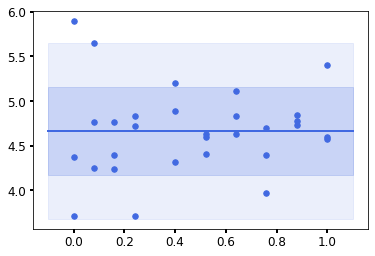

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,21.7308
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1017.5
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.233357


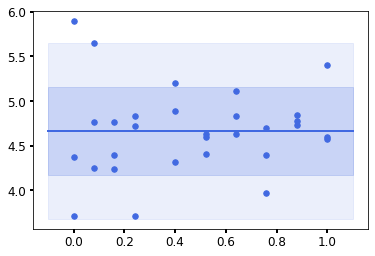

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,21.7323
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.233354


FBgn0015791


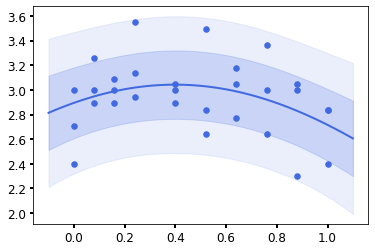

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,4.30584
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.58702
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0729408


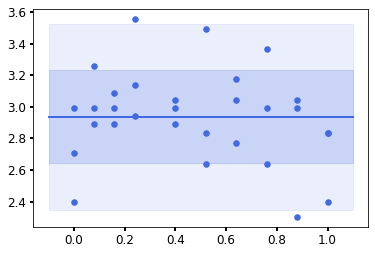

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,8.63323
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0841317


FBgn0022710


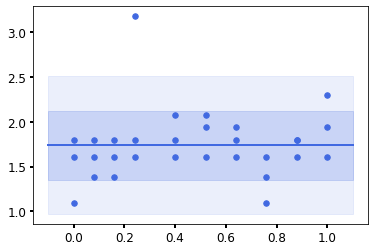

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,3.03011
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,19034.4
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.142483


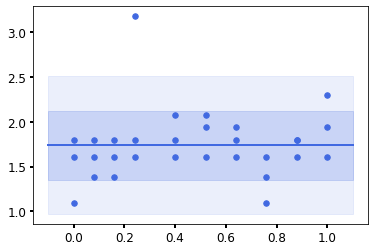

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,3.02993
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.142482


In [8]:
params = gp_counts.load_models(indexes,test,xtest,likelihood)

for i in range(len(indexes)):
    fig = plt.figure()
    print(indexes[i])
    model_index = 1
    for model,mean,var in zip(params['models'][i],params['means'][i],params['vars'][i]):
        plot()
        model_index = model_index + 1
        gpflow.utilities.print_summary(model, fmt='notebook')

In [9]:
genes_name = [
 'FBgn0000083',
 'FBgn0000108',
 'FBgn0000109',
 'FBgn0000115',
 'FBgn0000221',
 'FBgn0000289',
 'FBgn0000318',
 'FBgn0000464',
 'FBgn0000618',
 'FBgn0001099',
 'FBgn0001202',
 'FBgn0001276',
 'FBgn0001977',
 'FBgn0001995',
 'FBgn0003189']
from GPcounts.GPcounts_Module import Fit_GPcounts
likelihood = 'Negative_binomial' 
gp_counts = Fit_GPcounts(X,Y.loc[genes_name])
log_likelihood_ratio = gp_counts.One_sample_test(likelihood)
log_likelihood_ratio

  0%|          | 0/15 [00:00<?, ?it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 1.0417507803899869e-05, 'km': 35.0}


  7%|▋         | 1/15 [00:02<00:41,  2.99s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 1.9687607098200384e-10, 'km': 35.0}


 13%|█▎        | 2/15 [00:04<00:34,  2.63s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 8.376543902604004e-11, 'km': 35.0}


 20%|██        | 3/15 [00:06<00:30,  2.50s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 9.848156283941674e-07, 'km': 35.0}


 27%|██▋       | 4/15 [00:09<00:26,  2.44s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
0
Fit Cholesky decomposition was not successful.
{'ls': 0.06424861024331212, 'var': 0.1576037542307226, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.021893766666202154, 'km': 35.0}


 33%|███▎      | 5/15 [00:12<00:26,  2.68s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
local Optima
1
y_mean 495.76666666666665
mean_mean 226.8765003774922
abs(round((mean_mean-y_mean)/y_mean)) 1.0
{'ls': 0.06424861024331212, 'var': 0.1576037542307226, 'alpha': 0.0011437481734488664, 'km': 30.233257263183976}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.006605876847233751, 'km': 35.0}


 40%|████      | 6/15 [00:16<00:27,  3.08s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.4676544089239885, 'km': 35.0}


 47%|████▋     | 7/15 [00:18<00:21,  2.73s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 1.4816312610259128e-09, 'km': 35.0}


 53%|█████▎    | 8/15 [00:20<00:17,  2.57s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 1.2055467735122057e-11, 'km': 35.0}


 60%|██████    | 9/15 [00:22<00:14,  2.43s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 2.0547542710162348e-07, 'km': 35.0}


 67%|██████▋   | 10/15 [00:24<00:11,  2.30s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.00021227439205411712, 'km': 35.0}


 73%|███████▎  | 11/15 [00:27<00:09,  2.45s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 3.007087611341687e-06, 'km': 35.0}


 80%|████████  | 12/15 [00:29<00:07,  2.42s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.0046909120148695286, 'km': 35.0}


 87%|████████▋ | 13/15 [00:31<00:04,  2.31s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 3.278689155188387e-06, 'km': 35.0}


 93%|█████████▎| 14/15 [00:34<00:02,  2.42s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 0.034037906429648775, 'km': 35.0}


100%|██████████| 15/15 [00:37<00:00,  2.48s/it]


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
FBgn0000083,-121.903031,-123.328579,1.425547
FBgn0000108,-39.570343,-42.039714,2.469371
FBgn0000109,-84.517203,-84.009459,-0.507744
FBgn0000115,-108.593301,-163.701561,55.108260
FBgn0000221,-102.075553,-102.290767,0.215214
FBgn0000289,-166.823167,-168.212761,1.389595
FBgn0000318,-217.595748,-210.086645,-7.509103
FBgn0000464,-76.050819,-80.003489,3.952670
FBgn0000618,-86.495580,-87.296065,0.800486
FBgn0001099,-58.886176,-59.747565,0.861388


  0%|          | 0/15 [00:00<?, ?it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


  7%|▋         | 1/15 [00:01<00:14,  1.01s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 13%|█▎        | 2/15 [00:01<00:12,  1.00it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 20%|██        | 3/15 [00:03<00:12,  1.01s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 27%|██▋       | 4/15 [00:03<00:10,  1.01it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 33%|███▎      | 5/15 [00:05<00:10,  1.01s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 40%|████      | 6/15 [00:06<00:09,  1.01s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 47%|████▋     | 7/15 [00:06<00:07,  1.00it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 53%|█████▎    | 8/15 [00:07<00:06,  1.00it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 60%|██████    | 9/15 [00:08<00:05,  1.00it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 10/15 [00:10<00:05,  1.02s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 73%|███████▎  | 11/15 [00:10<00:03,  1.01it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 80%|████████  | 12/15 [00:11<00:02,  1.02it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 87%|████████▋ | 13/15 [00:12<00:01,  1.02it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 93%|█████████▎| 14/15 [00:13<00:00,  1.04it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 15/15 [00:14<00:00,  1.02it/s]


FBgn0000083


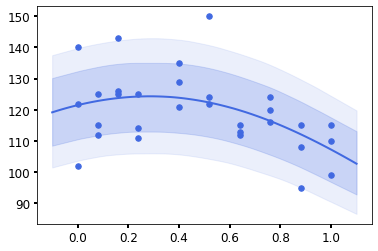

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,11.142638937287476
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,3.5325001888197995
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.0417507803899869e-05
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.43753645e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.00015271e-02, 0.00000000e+00, 0.00000000e+00..."


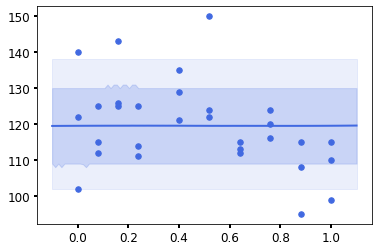

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,22.815593664002012
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,1.0417507803899869e-05
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00125347...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-3.50650102e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000108


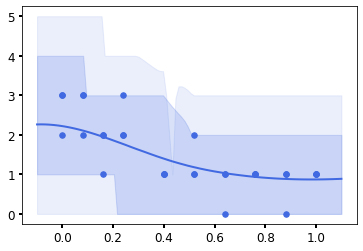

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.32049728141010625
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.43104536453469455
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.9687607098200384e-10
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.36763189e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-3.94994883e-01, 0.00000000e+00, 0.00000000e+00..."


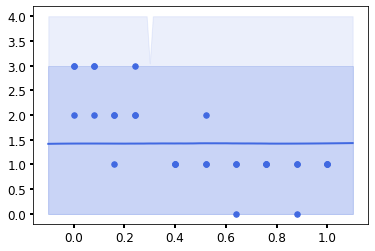

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.13418217248158448
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,1.9687607098200384e-10
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.22364817e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.86331628e-01, 0.00000000e+00, 0.00000000e+00..."


FBgn0000109


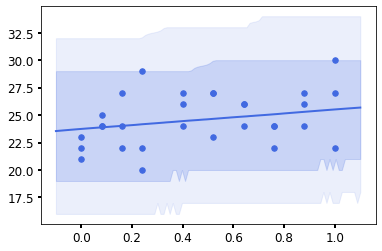

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,15.496179197368889
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,17.9056778466292
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,8.376543902604004e-11
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[8.03647985e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.52986322e-02, 0.00000000e+00, 0.00000000e+00..."


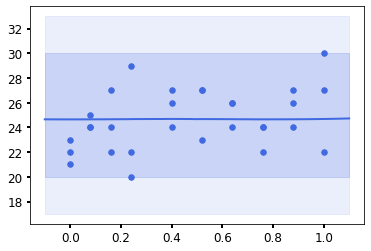

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,10.26036047764154
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,8.376543902604004e-11
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.99943649e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-1.14901626e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0000115


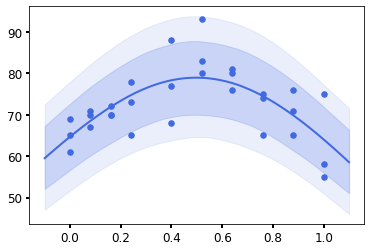

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.216633778994172
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.0639927669425266
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,9.848156283941674e-07
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.45391014e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.67551074e-02, 0.00000000e+00, 0.00000000e+00..."


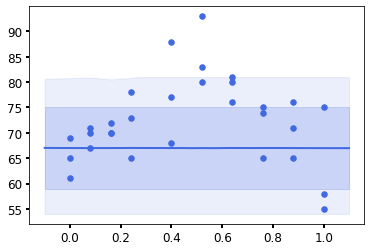

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.18916239019345493
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,9.848156283941674e-07
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.66726002e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-3.61621633e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000221


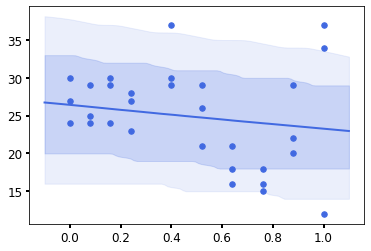

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,10.233349473745015
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,20.258397346433405
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.021893766666202154
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.02254309e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.05123875e-02, 0.00000000e+00, 0.00000000e+00..."


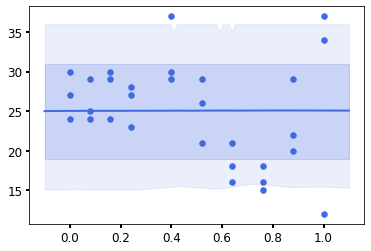

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,10.335420553342168
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.021893766666202154
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00094860e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-1.41341840e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0000289


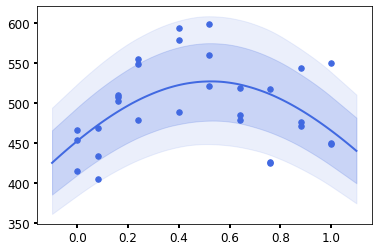

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,16.395913900328402
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.967947600479447
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.006605876847233751
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.50974075...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[9.10042333e-03, 0.00000000e+00, 0.00000000e+00..."


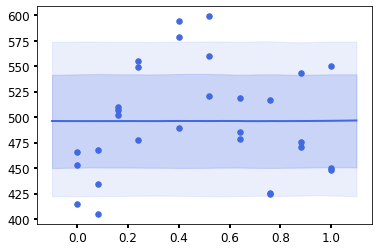

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,38.41795327497304
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.006605876847233751
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00127402e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-2.74001836e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000318


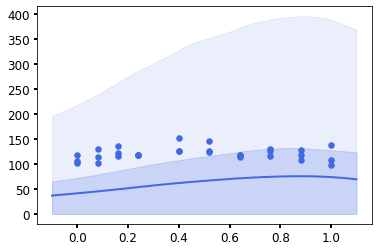

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,4.873120359551716
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.0902246329266325
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.4676544089239885
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.66969389e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.21155315e-01, 0.00000000e+00, 0.00000000e+00..."


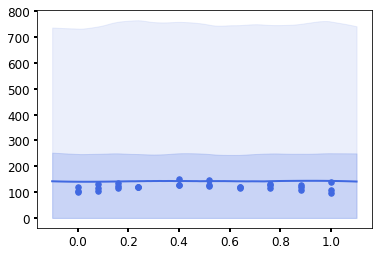

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,23.65324587022265
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,5.4676544089239885
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.96499551e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-8.59405962e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0000464


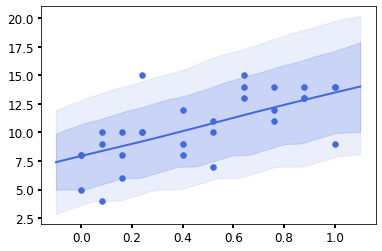

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,4.334326517055268
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.984033231607182
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.4816312610259128e-09
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.90579073e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[5.07969249e-02, 0.00000000e+00, 0.00000000e+00..."


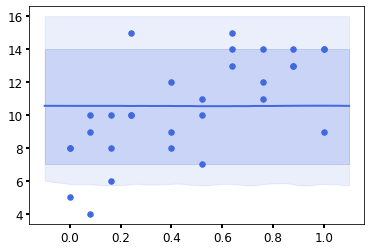

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,5.533062937706767
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,1.4816312610259128e-09
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.99729426e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-2.39282055e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0000618


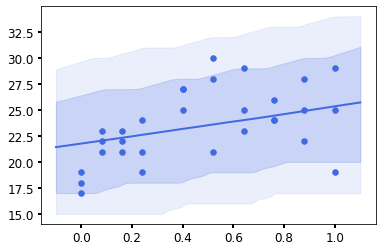

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,7.926933941572261
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,14.04229361187898
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.2055467735122057e-11
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.09283934e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.21082607e-02, 0.00000000e+00, 0.00000000e+00..."


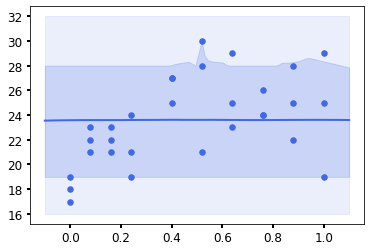

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,9.975668512478434
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,1.2055467735122057e-11
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00007444e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.19128246e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0001099


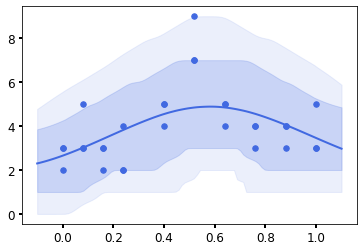

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.095249617558281
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.7181014442378235
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,2.0547542710162348e-07
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.12917401e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.93620096e-01, 0.00000000e+00, 0.00000000e+00..."


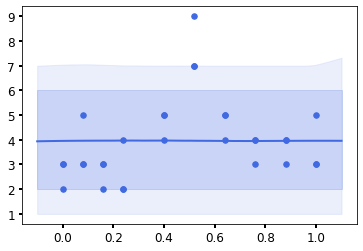

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.87869557623177
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,2.0547542710162348e-07
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.97755262e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-6.69394882e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0001202


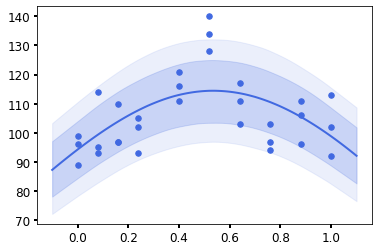

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,9.150733354956424
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.338787451871634
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.00021227439205411712
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.50223585e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-1.33047438e-02, 0.00000000e+00, 0.00000000e+00..."


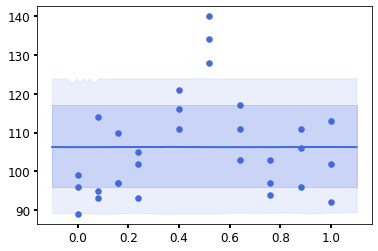

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,21.743044456488807
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.00021227439205411712
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00039052...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-3.84893515e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001276


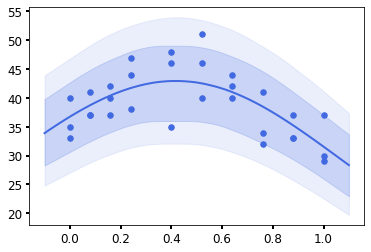

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,6.324006877156911
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.7994582905859424
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,3.007087611341687e-06
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.43204305e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.50126517e-02, 0.00000000e+00, 0.00000000e+00..."


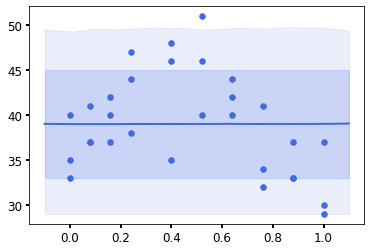

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,13.39852492415464
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,3.007087611341687e-06
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00044501e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[7.99613690e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001977


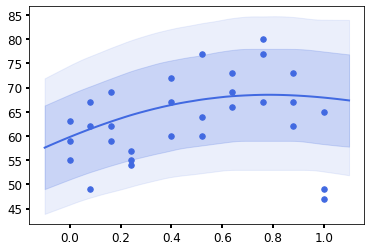

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,4.511255973147339
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,3.2857694251623575
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.0046909120148695286
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.92543120e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.80013071e-02, 0.00000000e+00, 0.00000000e+00..."


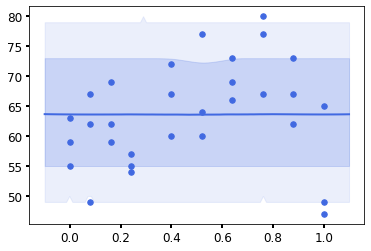

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,17.21367291000008
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.0046909120148695286
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00054541e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-6.29516033e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001995


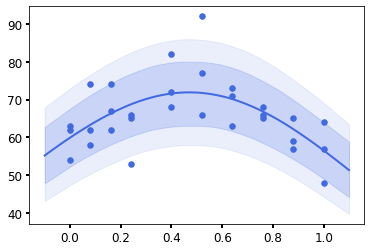

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.04045187884044
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.0159043106296872
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,3.278689155188387e-06
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.44258293e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.76353276e-02, 0.00000000e+00, 0.00000000e+00..."


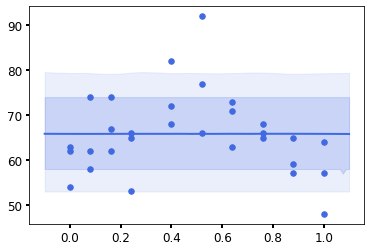

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,17.52079992149314
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,3.278689155188387e-06
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.99985373e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-5.38450982e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0003189


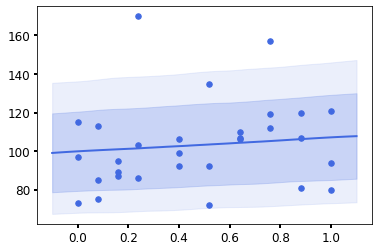

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,32.883597193685155
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,40.396465143661146
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.034037906429648775
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[8.02153502e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.00027400e-02, 0.00000000e+00, 0.00000000e+00..."


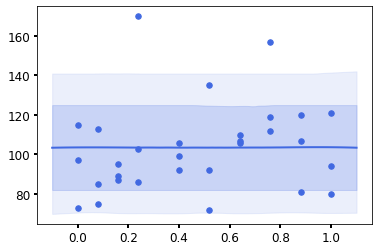

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,21.514157541993708
VGP.likelihood.alpha,Parameter,Softplus,,False,(),float64,0.034037906429648775
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.99800379e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[8.23387448e-03, 0.00000000e+00, 0.00000000e+00..."


In [10]:
indexes = log_likelihood_ratio.index.values # list of genes to be plotted 
test = 'One_sample_test' # name of the test
xtest = np.linspace(np.min(X.values)-.1,np.max(X.values)+.1,100)[:,None] # points to make prediction
likelihood = 'Negative_binomial'
params = gp_counts.load_models(indexes,test,xtest,likelihood)

for i in range(len(indexes)):
    fig = plt.figure()
    print(indexes[i])
    model_index = 1
    for mean,var,model in zip(params['means'][i],params['vars'][i],params['models'][i]):
        plot() 
        model_index = model_index + 1
        gpflow.utilities.print_summary(model, fmt='notebook')

In [11]:
likelihood = 'Gaussian'
log_likelihood_ratio = gp_counts.One_sample_test(likelihood)
log_likelihood_ratio

  0%|          | 0/15 [00:00<?, ?it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


  7%|▋         | 1/15 [00:00<00:06,  2.14it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 13%|█▎        | 2/15 [00:00<00:05,  2.19it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 20%|██        | 3/15 [00:01<00:05,  2.22it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 27%|██▋       | 4/15 [00:01<00:05,  1.98it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 33%|███▎      | 5/15 [00:02<00:04,  2.09it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 40%|████      | 6/15 [00:02<00:04,  2.14it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 47%|████▋     | 7/15 [00:03<00:03,  2.17it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 53%|█████▎    | 8/15 [00:03<00:03,  2.17it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 60%|██████    | 9/15 [00:04<00:02,  2.15it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 10/15 [00:04<00:02,  2.20it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 73%|███████▎  | 11/15 [00:05<00:01,  2.20it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 80%|████████  | 12/15 [00:05<00:01,  2.24it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 87%|████████▋ | 13/15 [00:05<00:00,  2.25it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 93%|█████████▎| 14/15 [00:06<00:00,  2.26it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 15/15 [00:06<00:00,  2.19it/s]

{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
FBgn0000083,22.033062,20.807010,1.226051
FBgn0000108,-5.365300,-14.290325,8.925025
FBgn0000109,23.973779,23.271379,0.702400
FBgn0000115,22.736244,17.358335,5.377909
FBgn0000221,-5.711698,-6.435773,0.724075
FBgn0000289,19.237090,18.614823,0.622267
FBgn0000318,21.103859,20.936537,0.167323
FBgn0000464,-3.242211,-9.536241,6.294030
FBgn0000618,16.425938,10.899603,5.526335
FBgn0001099,-6.858255,-9.649253,2.790997


  7%|▋         | 1/15 [00:00<00:01,  8.41it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 20%|██        | 3/15 [00:00<00:01,  8.16it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 33%|███▎      | 5/15 [00:00<00:01,  8.14it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 53%|█████▎    | 8/15 [00:00<00:00,  9.26it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 10/15 [00:01<00:00, 10.04it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 80%|████████  | 12/15 [00:01<00:00,  9.44it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 93%|█████████▎| 14/15 [00:01<00:00,  8.27it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 15/15 [00:01<00:00,  8.99it/s]


FBgn0000083


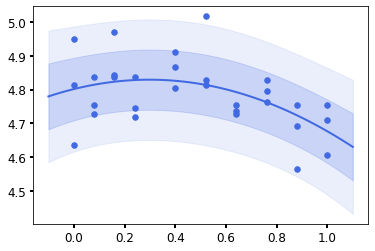

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.8657
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,3.49797
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00755757


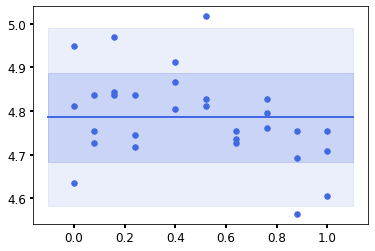

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,22.9072
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0100925


FBgn0000108


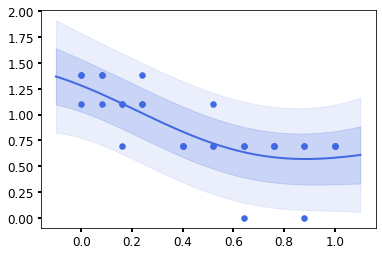

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.05498
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.804482
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0555197


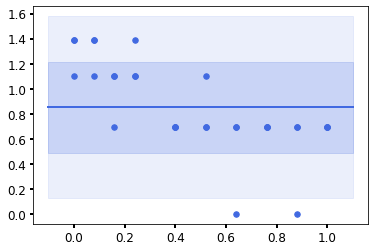

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.730307
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.127857


FBgn0000109


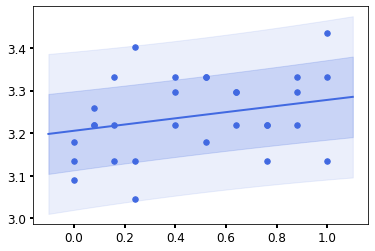

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.4143
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,38.2103
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00795114


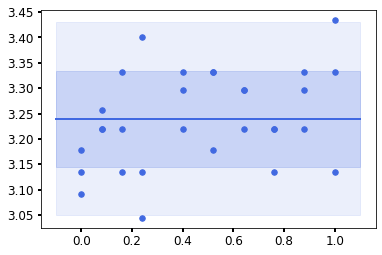

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.4951
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00874733


FBgn0000115


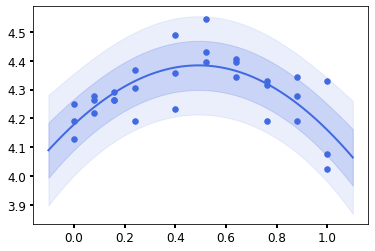

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,8.19615
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.05598
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00671229


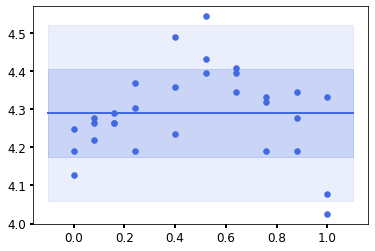

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,18.3961
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0128995


FBgn0000221


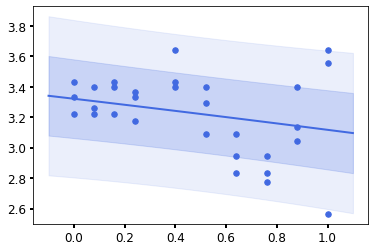

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.5829
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,13.9288
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0615829


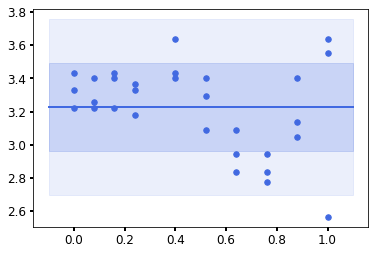

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.4108
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0678825


FBgn0000289


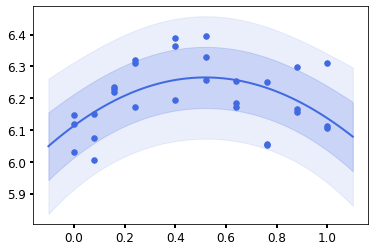

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,17.4563
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,3.01094
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00864111


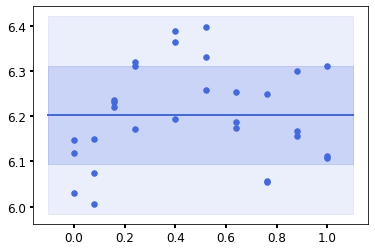

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,38.4711
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0115317


FBgn0000318


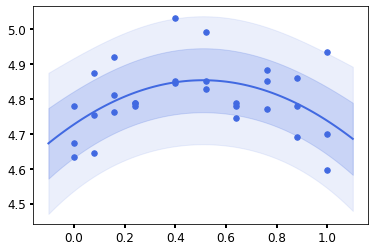

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.5373
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.84921
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0078485


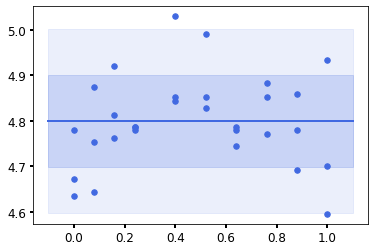

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,23.0343
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0100008


FBgn0000464


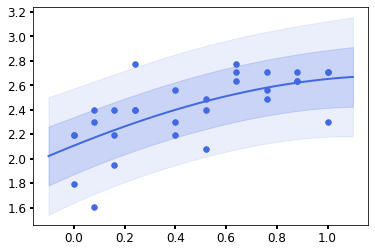

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,3.73676
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.32639
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0490498


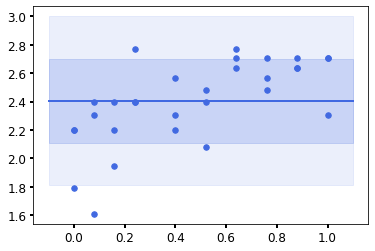

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,5.79092
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0857835


FBgn0000618


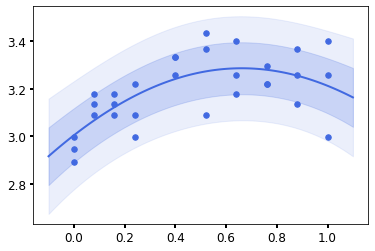

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,4.8123
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.0317
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0112709


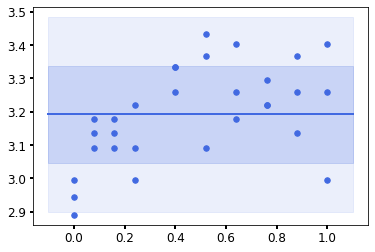

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,10.1854
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.020553


FBgn0001099


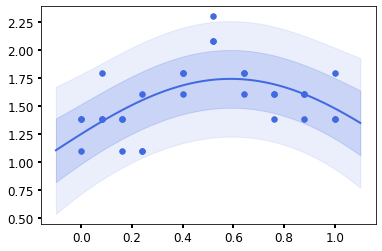

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.24669
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.900156
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0620964


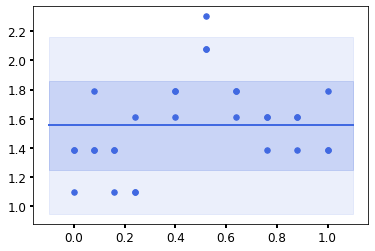

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,2.42394
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0890905


FBgn0001202


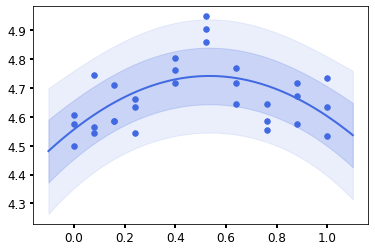

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,9.82765
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.44531
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0089707


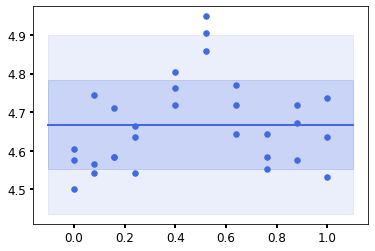

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,21.7892
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0129889


FBgn0001276


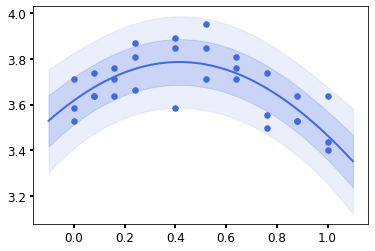

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,6.06313
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.79275
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00936033


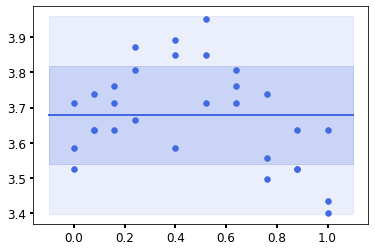

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,13.5333
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0191534


FBgn0001977


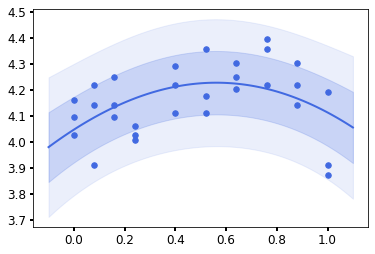

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,8.04686
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.38641
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0139732


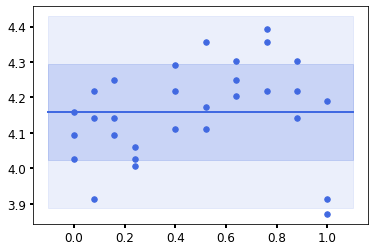

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,17.2946
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0177214


FBgn0001995


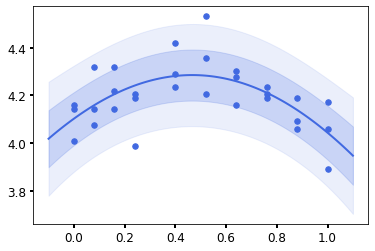

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,7.93039
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.03962
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0106832


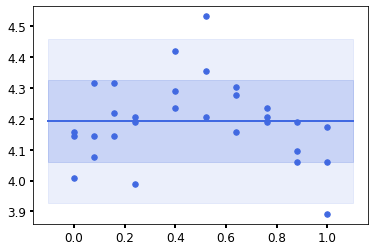

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,17.58
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0169873


FBgn0003189


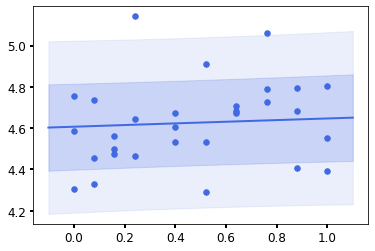

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,21.343
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,62.9818
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0410809


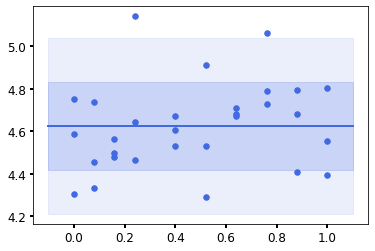

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,21.3993
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.0416827


In [12]:
params = gp_counts.load_models(indexes,test,xtest,likelihood)

for i in range(len(indexes)):
    fig = plt.figure()
    print(indexes[i])
    model_index = 1
    for model,mean,var in zip(params['models'][i],params['means'][i],params['vars'][i]):
        plot()
        model_index = model_index + 1
        gpflow.utilities.print_summary(model, fmt='notebook')

In [13]:
likelihood = 'Poisson' 
#genes_name = ['FBgn0004185','FBgn0001977']
gp_counts = Fit_GPcounts(X,Y.loc[genes_name])
log_likelihood_ratio = gp_counts.One_sample_test(likelihood)
log_likelihood_ratio

  0%|          | 0/15 [00:00<?, ?it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


  7%|▋         | 1/15 [00:02<00:32,  2.32s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 13%|█▎        | 2/15 [00:03<00:26,  2.07s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 20%|██        | 3/15 [00:05<00:25,  2.09s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 27%|██▋       | 4/15 [00:07<00:22,  2.06s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 33%|███▎      | 5/15 [00:10<00:20,  2.07s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 40%|████      | 6/15 [00:15<00:26,  2.96s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 47%|████▋     | 7/15 [00:17<00:22,  2.75s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 53%|█████▎    | 8/15 [00:19<00:17,  2.46s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 60%|██████    | 9/15 [00:20<00:13,  2.28s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 10/15 [00:22<00:10,  2.09s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 73%|███████▎  | 11/15 [00:25<00:08,  2.19s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 80%|████████  | 12/15 [00:26<00:06,  2.10s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 87%|████████▋ | 13/15 [00:29<00:04,  2.10s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 93%|█████████▎| 14/15 [00:31<00:02,  2.10s/it]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 15/15 [00:33<00:00,  2.23s/it]


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
FBgn0000083,-121.902525,-123.332872,1.430346
FBgn0000108,-39.570346,-42.039768,2.469422
FBgn0000109,-84.151579,-84.010614,-0.140964
FBgn0000115,-108.592740,-111.342594,2.749854
FBgn0000221,-105.031659,-104.143013,-0.888645
FBgn0000289,-184.538361,-211.008421,26.470060
FBgn0000318,-123.299468,-123.626388,0.326920
FBgn0000464,-76.049851,-80.003500,3.953649
FBgn0000618,-86.657942,-87.300341,0.642399
FBgn0001099,-58.886166,-59.747561,0.861394


  0%|          | 0/15 [00:00<?, ?it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


  7%|▋         | 1/15 [00:00<00:12,  1.11it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 13%|█▎        | 2/15 [00:01<00:11,  1.13it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 20%|██        | 3/15 [00:02<00:10,  1.13it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 27%|██▋       | 4/15 [00:03<00:09,  1.11it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 33%|███▎      | 5/15 [00:04<00:08,  1.12it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 40%|████      | 6/15 [00:05<00:07,  1.14it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 47%|████▋     | 7/15 [00:06<00:06,  1.17it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 53%|█████▎    | 8/15 [00:07<00:06,  1.14it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 60%|██████    | 9/15 [00:07<00:05,  1.13it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 67%|██████▋   | 10/15 [00:08<00:04,  1.14it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 73%|███████▎  | 11/15 [00:09<00:03,  1.13it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 80%|████████  | 12/15 [00:10<00:02,  1.14it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 87%|████████▋ | 13/15 [00:11<00:01,  1.16it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


 93%|█████████▎| 14/15 [00:12<00:00,  1.14it/s]

{'ls': 0.07200000000000001, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.10799999999999998, 'alpha': 5.0, 'km': 35.0}


100%|██████████| 15/15 [00:13<00:00,  1.14it/s]


FBgn0000083


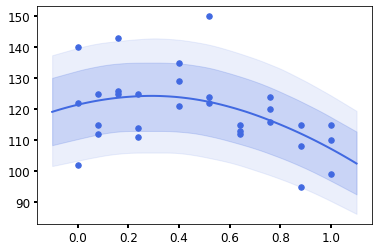

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,11.01234010591877
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,3.497263032623129
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.44592657e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.00612645e-02, 0.00000000e+00, 0.00000000e+00..."


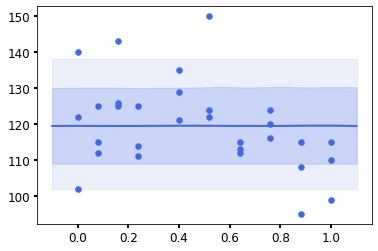

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,22.86111885131553
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00025677...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-3.50063628e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000108


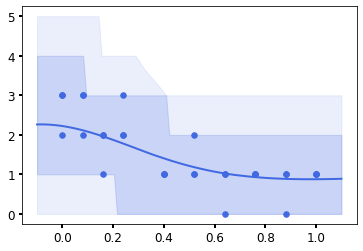

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.321662953460746
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.43163339414790997
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.36644912e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.95223571e-01, 0.00000000e+00, 0.00000000e+00..."


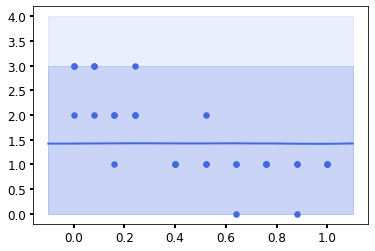

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.1341821724854328
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.22364817e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.86331628e-01, 0.00000000e+00, 0.00000000e+00..."


FBgn0000109


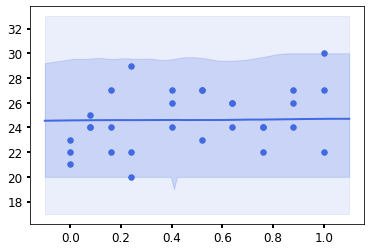

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,16.61556122873689
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,101.0156067614576
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[7.84925357e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[9.76056898e-03, 0.00000000e+00, 0.00000000e+00..."


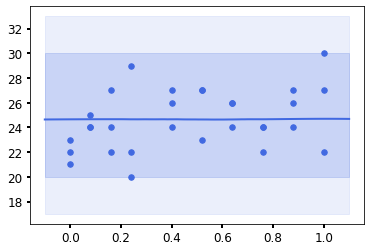

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,10.256674464340017
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00012272e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-1.14917680e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0000115


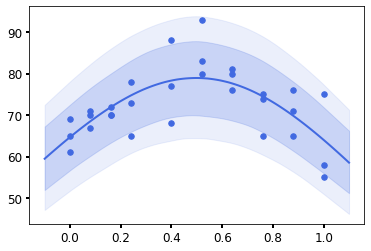

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.258376949770566
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.0668013435722905
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.45027408e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.67223296e-02, 0.00000000e+00, 0.00000000e+00..."


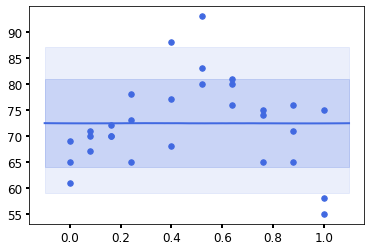

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,18.15995267993998
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00467533e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[5.04116898e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000221


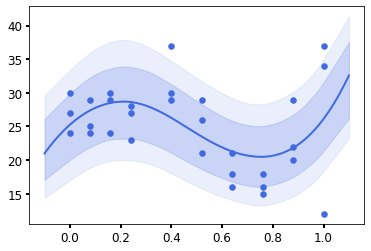

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,9.14710413856554
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.7050215604879336
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.06351289e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.08970584e-02, 0.00000000e+00, 0.00000000e+00..."


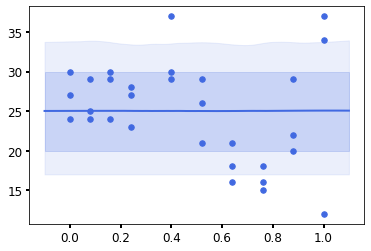

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,10.314845485449847
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00190330e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-1.13759784e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0000289


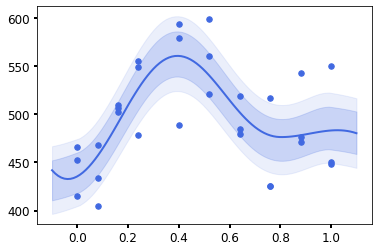

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,16.575303612290732
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.5479334400333573
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.49257364...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-6.35763855e-03, 0.00000000e+00, 0.00000000e+00..."


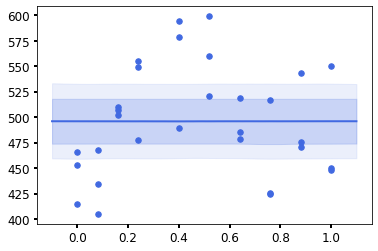

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,38.381994274571525
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00171039...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-1.32978427e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000318


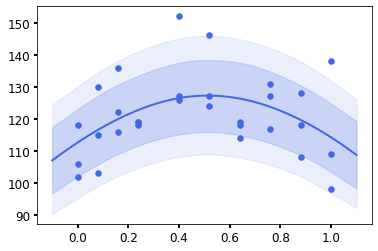

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,10.48094097228802
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.8797953566126813
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.45880515e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.10673705e-02, 0.00000000e+00, 0.00000000e+00..."


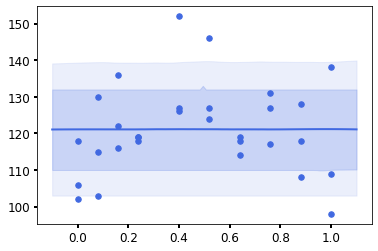

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,22.03852618871932
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.02157639e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.53893632e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0000464


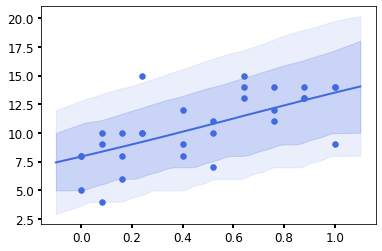

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,4.242516205046777
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,3.039003340707153
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00163217e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[5.13540946e-02, 0.00000000e+00, 0.00000000e+00..."


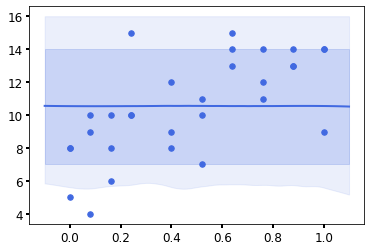

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,5.534794470650621
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.99570591e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.39248346e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0000618


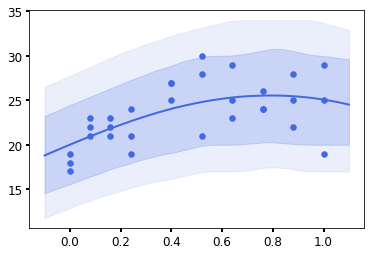

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,5.154330965708747
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.3543713397816823
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.31766777e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.30831867e-02, 0.00000000e+00, 0.00000000e+00..."


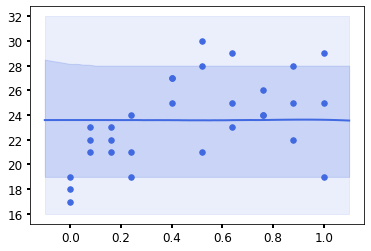

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,9.972312525384929
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00024406e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.19158800e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0001099


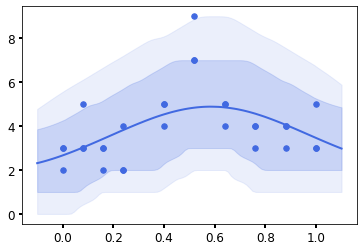

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.092850458101779
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.7175873185859476
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.13742325e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.93857679e-01, 0.00000000e+00, 0.00000000e+00..."


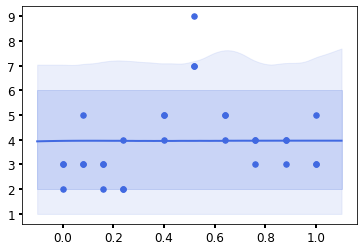

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.8810482185156892
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.97158248e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-6.68879026e-02, 0.00000000e+00, 0.00000000e+00..."


FBgn0001202


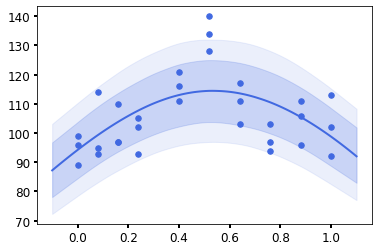

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,9.754251295999161
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.3635094374907824
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.45496141e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.27892985e-02, 0.00000000e+00, 0.00000000e+00..."


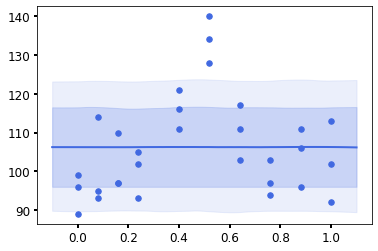

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,21.753733663033795
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00014493...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-3.80520554e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001276


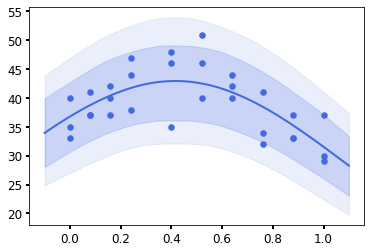

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,6.187594555365746
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.7909324918838658
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.44766804e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[2.53048029e-02, 0.00000000e+00, 0.00000000e+00..."


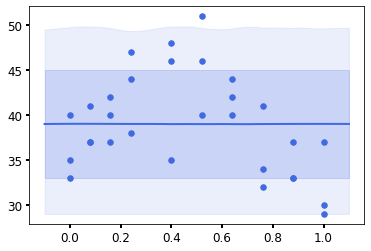

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,13.488701061088824
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[9.97097121e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-7.96876562e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001977


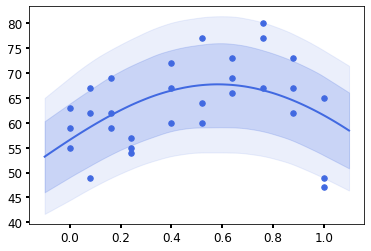

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,7.935395186700803
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.4240069743681483
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.43193351e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.75380905e-02, 0.00000000e+00, 0.00000000e+00..."


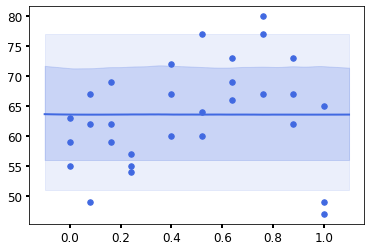

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,17.191246091341892
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00118229e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[5.52726889e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0001995


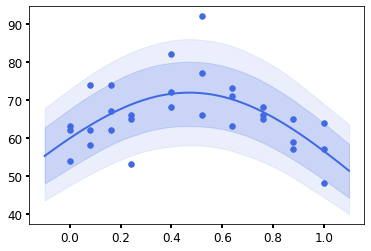

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.036071193531269
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.015272089417817
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.44294277e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[1.76335999e-02, 0.00000000e+00, 0.00000000e+00..."


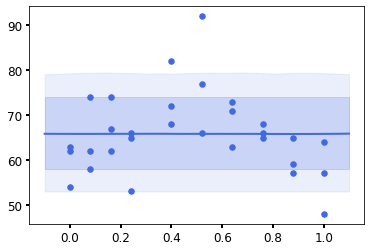

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,17.375335326138167
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00415745e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[5.40571024e-03, 0.00000000e+00, 0.00000000e+00..."


FBgn0003189


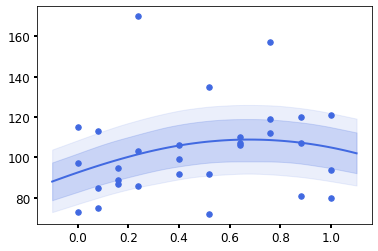

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,10.12592488154652
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,3.1484596384416084
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.42226511e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[-1.19645305e-02, 0.00000000e+00, 0.00000000e+00..."


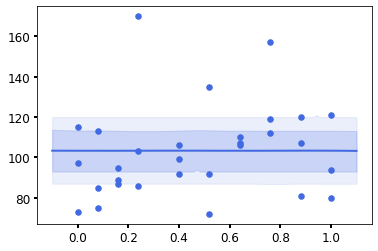

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,21.483785248216673
VGP.q_mu,Parameter,,,True,"(30, 1)",float64,[[1.00042847e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 30, 30)",float64,"[[[3.88223601e-03, 0.00000000e+00, 0.00000000e+00..."


In [14]:
indexes = log_likelihood_ratio.index.values # list of genes to be plotted 
test = 'One_sample_test' # name of the test
xtest = np.linspace(np.min(X.values)-.1,np.max(X.values)+.1,100)[:,None] # points to make prediction
likelihood = 'Poisson'
params = gp_counts.load_models(indexes,test,xtest,likelihood)

for i in range(len(indexes)):
    fig = plt.figure()
    print(indexes[i])
    model_index = 1
    for mean,var,model in zip(params['means'][i],params['vars'][i],params['models'][i]):
        plot() 
        model_index = model_index + 1
        gpflow.utilities.print_summary(model, fmt='notebook')